# Clustering Analysis in R programming

## Load packages


In [4]:
if(!require("install.load")){
  install.packages("install.load")
}

install.load::install_load(c("tidyverse", "readxl", "factoextra", "NbClust", "cluster", "janitor", "tidyimpute"))

Loading required package: install.load
Warning message:
"package 'install.load' was built under R version 3.6.3"also installing the dependency 'jsonlite'




  There is a binary version available but the source version is later:
          binary source needs_compilation
tidyverse  1.3.0  1.3.1             FALSE

package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Sakinat  Folorunso\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\Sakinat  Folorunso\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"


The downloaded binary packages are in
	C:\Users\Sakinat  Folorunso\AppData\Local\Temp\Rtmp0uRxRV\downloaded_packages


installing the source package 'tidyverse'

Warning message in install.packages(package, repos = c("https://cloud.r-project.org", :
"installation of package 'tidyverse' had non-zero exit status"

Error in (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  : 
  there is no package called 'tidyverse'


Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Error: package or namespace load failed for 'ggplot2':
 .onAttach failed in attachNamespace() for 'ggplot2', details:
  call: loadNamespace(name)
  error: there is no package called 'withr'


Error : package 'ggplot2' could not be loaded


Warning message:
"package 'tidyimpute' is not available (for R version 3.6.1)"

Error in (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  : 
  there is no package called 'tidyimpute'


In [6]:
install.packages('tidyverse')

also installing the dependency 'jsonlite'




  There is a binary version available but the source version is later:
          binary source needs_compilation
tidyverse  1.3.0  1.3.1             FALSE

package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Sakinat  Folorunso\anaconda3\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\Sakinat  Folorunso\anaconda3\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"


The downloaded binary packages are in
	C:\Users\Sakinat  Folorunso\AppData\Local\Temp\Rtmp0uRxRV\downloaded_packages


installing the source package 'tidyverse'

Warning message in install.packages("tidyverse"):
"installation of package 'tidyverse' had non-zero exit status"

## Import data

In [5]:
data <-  read_xlsx("COVID-19 and economic data in Nigeria vs3.xlsx", sheet = 1, skip = 1)

data  <- data %>% 
select(-c(2,3, 4, 7, 14, 17:21, 25)) %>% 
janitor::clean_names() %>%  mutate_at(5, ~as.numeric(.)) %>% 
tidyimpute::impute_mean() %>%
column_to_rownames(var = "states")

ERROR: Error in column_to_rownames(., var = "states"): could not find function "column_to_rownames"


## Normalizing the data

In [ ]:
data <- scale(data)

## Method of choosing K


### 1. Elbow method

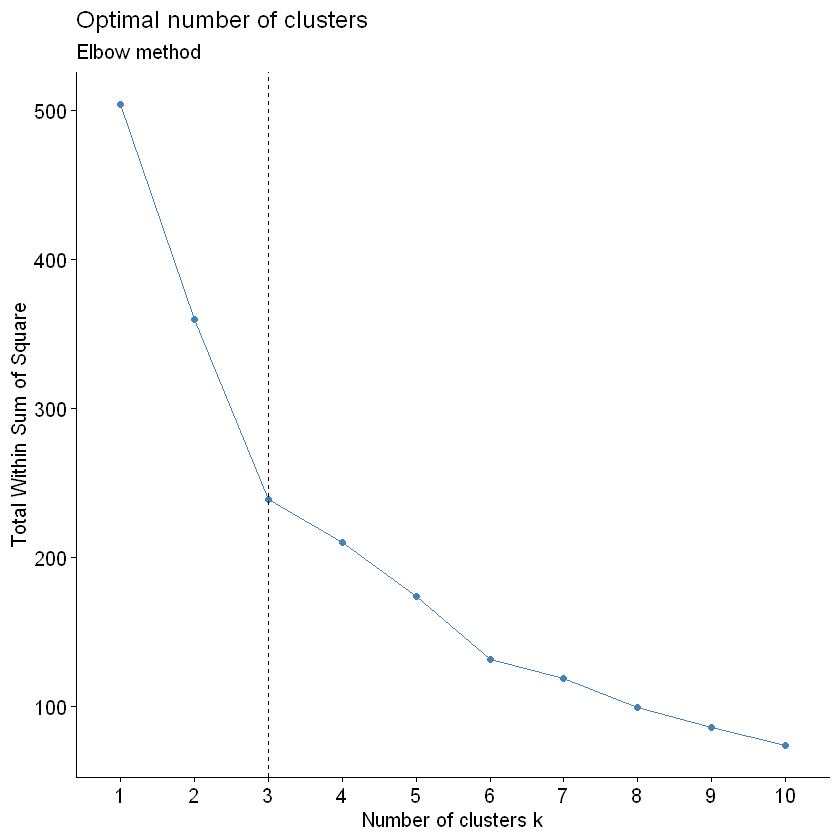

In [11]:
fviz_nbclust(data, kmeans, method = "wss") +
  geom_vline(xintercept = 3, linetype = 2) + # add line for better visualization
  labs(subtitle = "Elbow method") # add subtitle

# 2.  Silhouette method

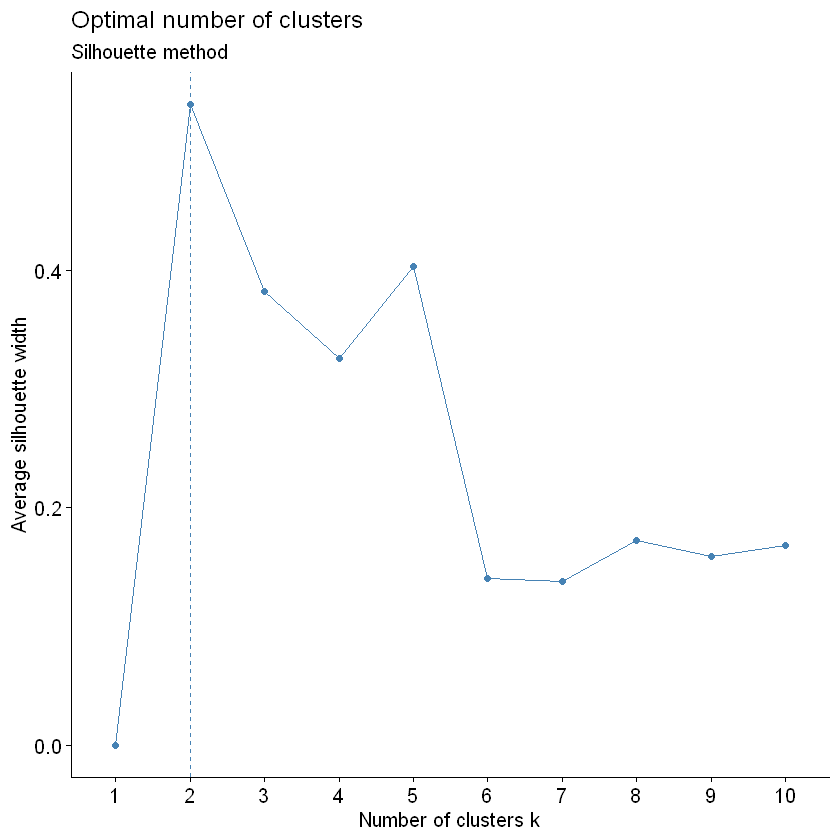

In [16]:
fviz_nbclust(data, kmeans, method = "silhouette") +
  labs(subtitle = "Silhouette method")

# Clustering method:  k-means clustering

In [30]:
km.res <- eclust(data, "kmeans", k = 3, nstart = 50, graph = FALSE)

# k-means group number of each observation
print(km.res$cluster)

       Abia     Adamawa   Akwa Ibom     Anambra      Bauchi     Bayelsa 
          2           2           2           2           2           2 
      Benue       Borno Cross River       Delta      Ebonyi         Edo 
          2           2           2           2           2           2 
      Ekiti       Enugu       Gombe         Imo      Jigawa      Kaduna 
          2           2           2           2           2           3 
       Kano     Katsina       Kebbi        Kogi       Kwara       Lagos 
          3           3           2           2           2           1 
   Nasarawa       Niger        Ogun        Ondo        Osun         Oyo 
          2           2           3           2           2           2 
    Plateau      Rivers      Sokoto      Taraba        Yobe     Zamfara 
          2           2           2           2           2           2 
        FCT 
          2 


###  Visualize k-means clusters

Too few points to calculate an ellipse


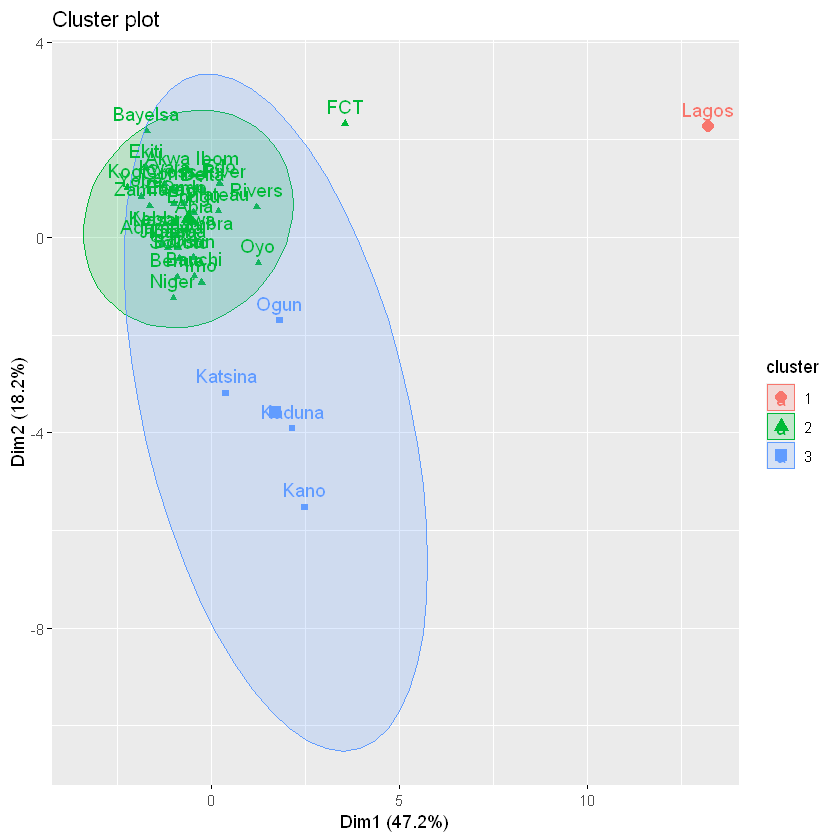

In [29]:
fviz_cluster(km.res,  ellipse.type  = "norm", ellipse.level = 0.95)

# Clustering method: Hierarchical clustering: single linkage

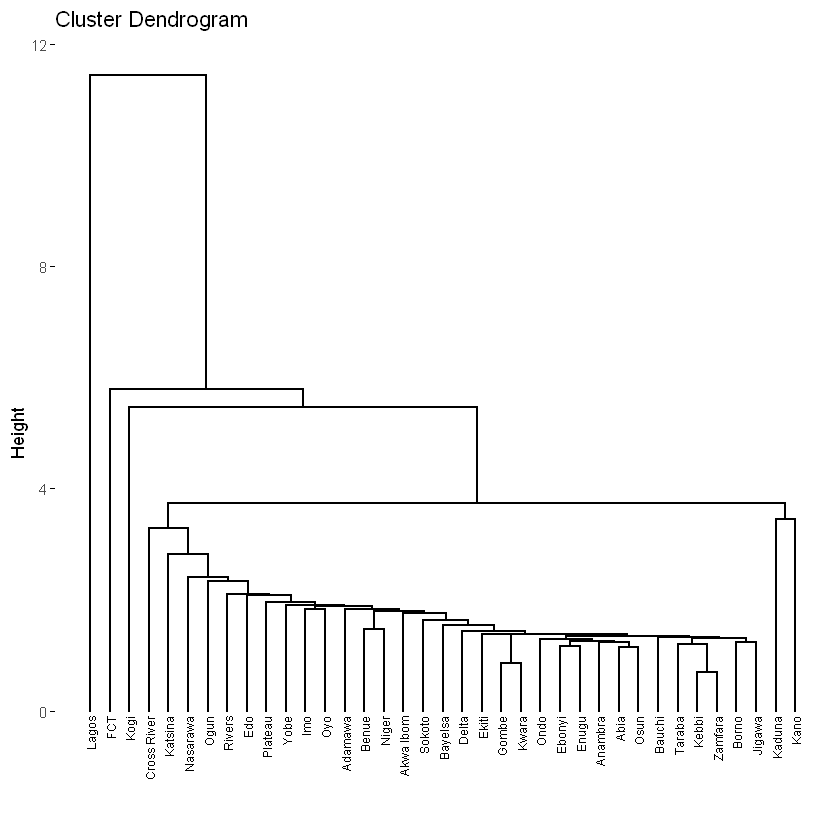

In [41]:
hclust <- hclust(dist(data), method = "single")

# Dendrogram
fviz_dend(hclust, rect = TRUE, show_labels = TRUE, cex = 0.5)

# Clustering method:  Enhanced hierarchical clustering

In [33]:
res.hc <- eclust(data, "hclust", k = 3,
                 method = "ward.D2", graph = FALSE) 

print(res.hc$cluster)

       Abia     Adamawa   Akwa Ibom     Anambra      Bauchi     Bayelsa 
          1           1           1           1           1           1 
      Benue       Borno Cross River       Delta      Ebonyi         Edo 
          1           1           1           1           1           1 
      Ekiti       Enugu       Gombe         Imo      Jigawa      Kaduna 
          1           1           1           1           1           2 
       Kano     Katsina       Kebbi        Kogi       Kwara       Lagos 
          2           1           1           1           1           3 
   Nasarawa       Niger        Ogun        Ondo        Osun         Oyo 
          1           1           1           1           1           1 
    Plateau      Rivers      Sokoto      Taraba        Yobe     Zamfara 
          1           1           1           1           1           1 
        FCT 
          1 


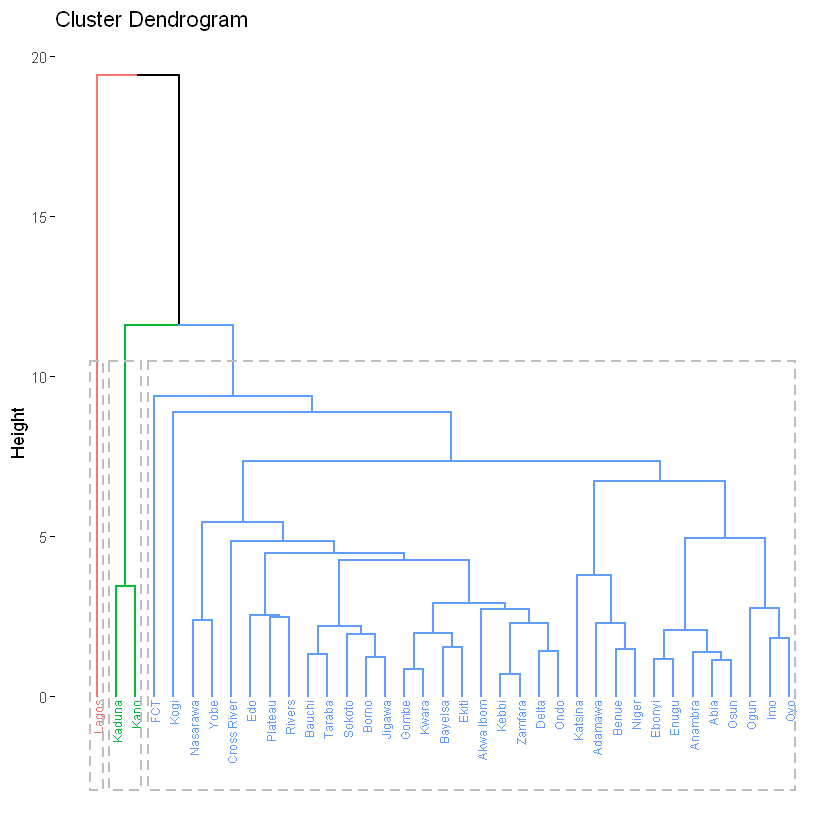

In [34]:
# Dendrogram
fviz_dend(res.hc, rect = TRUE, show_labels = TRUE, cex = 0.5) 

Too few points to calculate an ellipse
Too few points to calculate an ellipse


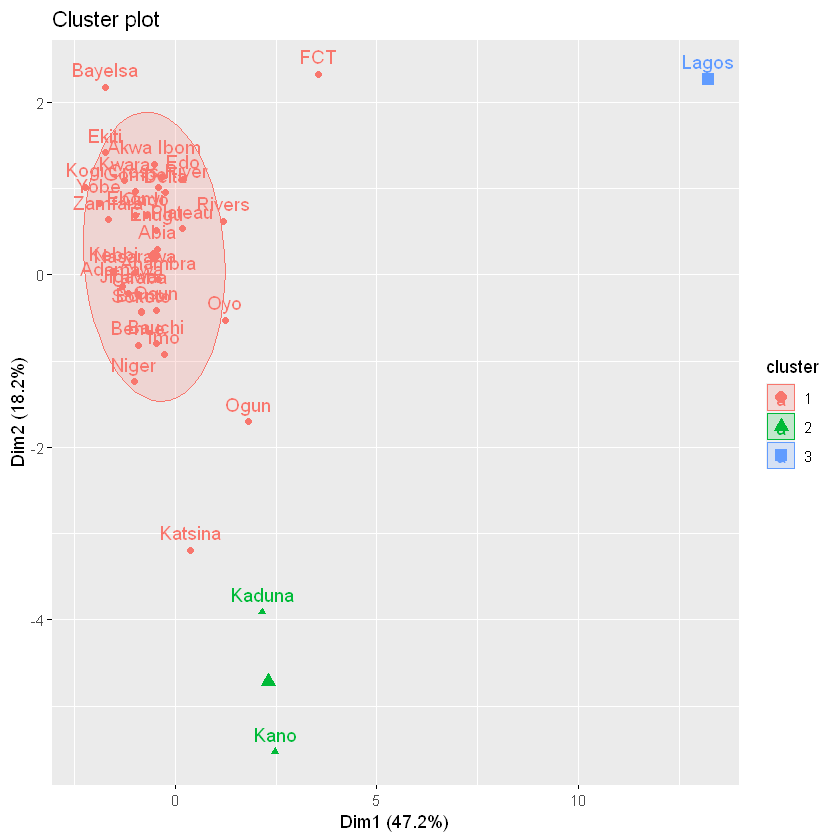

In [35]:
fviz_cluster(res.hc, ellipse.type = "norm", ellipse.level = 0.68)

  cluster size ave.sil.width
1       1   34          0.47
2       2    2          0.48
3       3    1          0.00


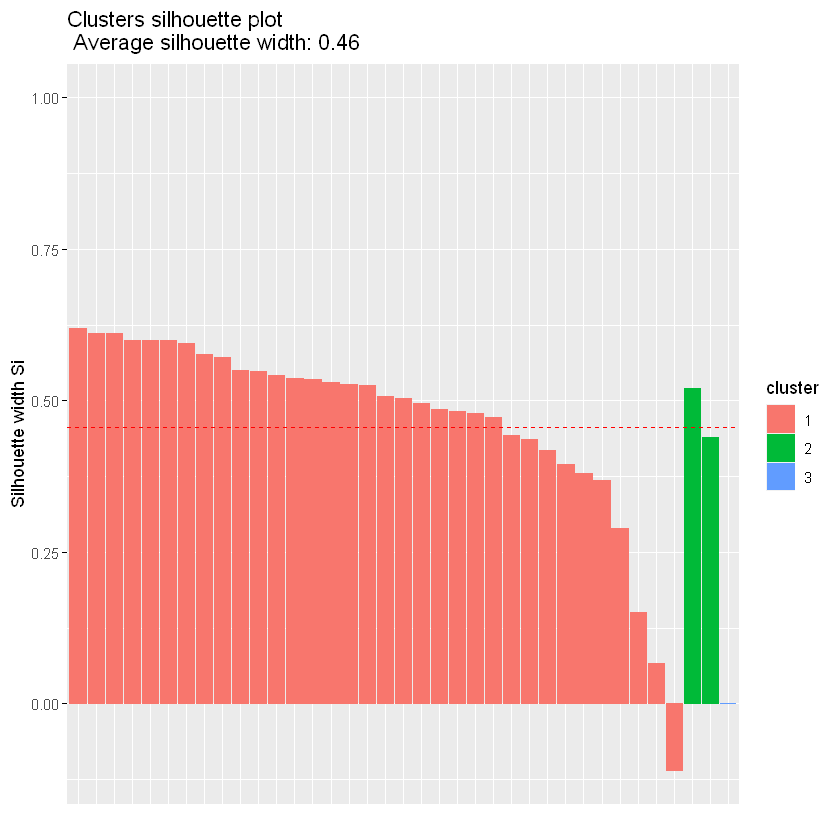

In [36]:
# Visualize the silhouette of clusters
fviz_silhouette(res.hc)

# Clustering method: Combining hierarchical clustering and k-means (Compute hierarchical k-means clustering)


Too few points to calculate an ellipse


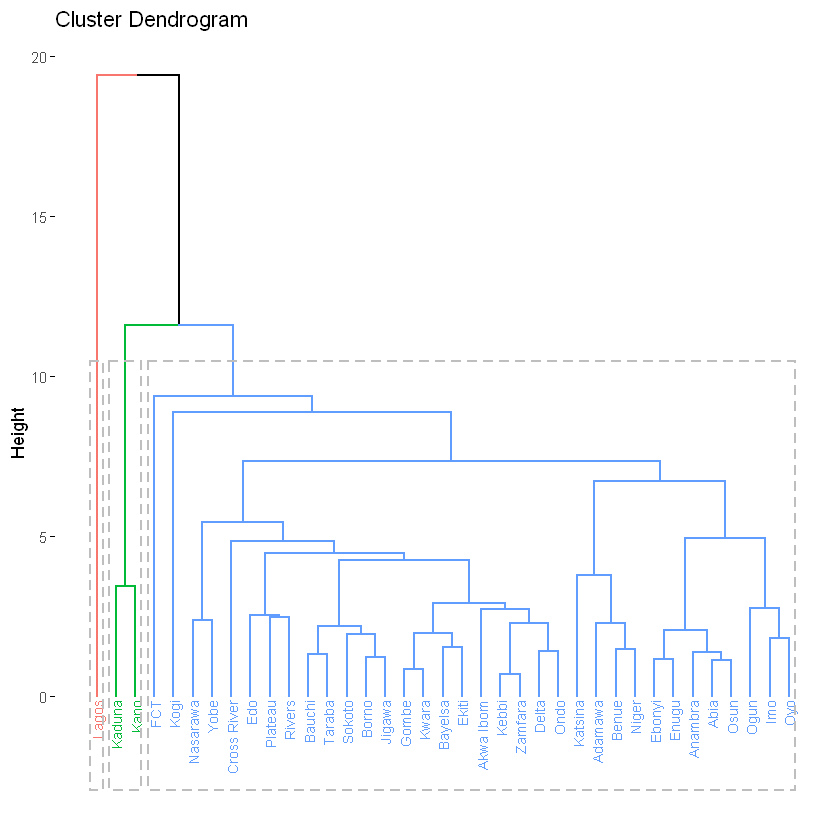

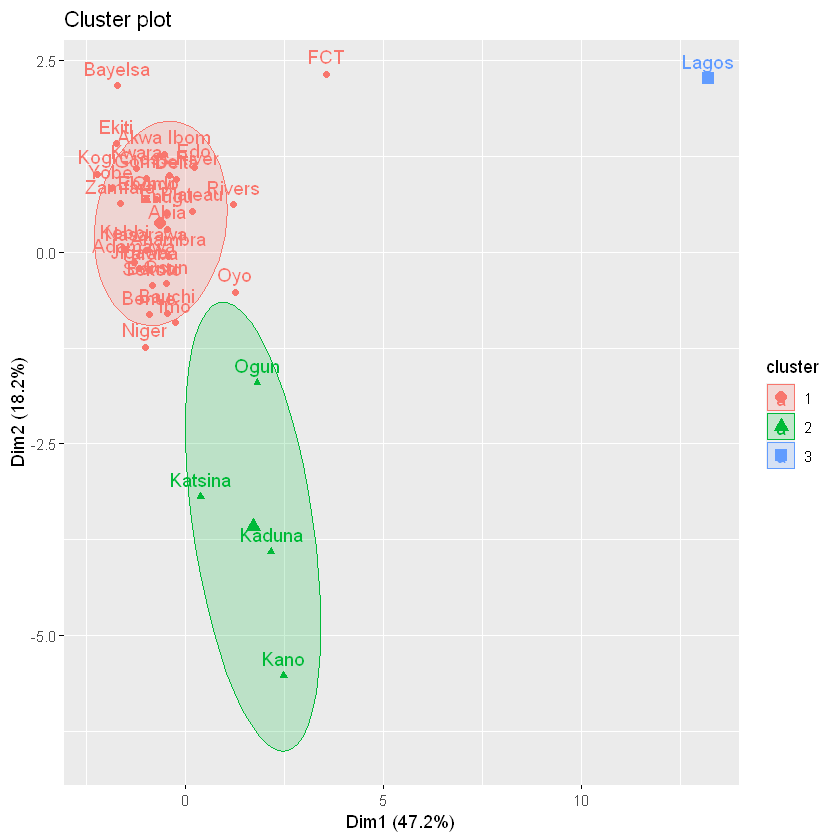

In [37]:
res.hk <-hkmeans(data, 3)

# Visualize the tree
fviz_dend(res.hk, cex = 0.6, rect = TRUE)


# Visualize the hkmeans final clusters
fviz_cluster(res.hk, ellipse.type = "norm", ellipse.level = 0.68)